## Caso Polars

### Instrucciones
Accede al sitio web proporcionado y descarga los 4 parquets de taxis de NYC para Enero de 2025. A partir de la información que se encuentra en los datasets, elabora 2 notebooks (uno con Pandas y otro con Polars) reportando por lo menos lo siguiente en un informe estadístico:

In [1]:
# Importamos las librerias

import polars as pl
import matplotlib.pyplot as plt
import numpy as np

## 0. Cargando los archivos .parquet de cada tipo de Taxi.

In [13]:
taxi_amarillo = pl.read_parquet("yellow_tripdata_2025-01.parquet")
taxi_verde = pl.read_parquet("green_tripdata_2025-01.parquet")
taxi_particular = pl.read_parquet("fhvhv_tripdata_2025-01.parquet")

### 1. Promedio de ingresos brutos de cada tipo de taxi y de todos los taxis
Se obtiene el ingreso bruto de cada tipo de taxi, así como de todos los taxis.

In [22]:
promedioAmarillo = taxi_amarillo["total_amount"].mean()
promedioVerde = taxi_verde["total_amount"].mean()
promedioParticular = taxi_particular["base_passenger_fare"].mean()

print(f"Promedio de los Taxis Amarillos: {promedioAmarillo}")
print(f"Promedio de los Taxis Verdes: {promedioVerde}")
print(f"Promedio de los Taxis Particulares {promedioParticular}")
print(f"\nPromedio de los tres Taxis: {np.mean([promedioVerde,promedioParticular,promedioAmarillo])}")



Promedio de los Taxis Amarillos: 25.611291697288177
Promedio de los Taxis Verdes: 22.634241609071722
Promedio de los Taxis Particulares 24.265754373809703

Promedio de los tres Taxis: 24.1704292267232


### 2. Qué tipo de taxis recorrieron la mayor cantidad de distancia en Enero
De acuerdo a la suma de distancias para cada tipo de taxi, se observa la distancia máxima entre los tres taxis. Por lo tanto,los taxis que recorrieron la mayor cantidad de distancia en Enero son los **taxis particulares**. 

Text(0.5, 1.0, 'Distancias')

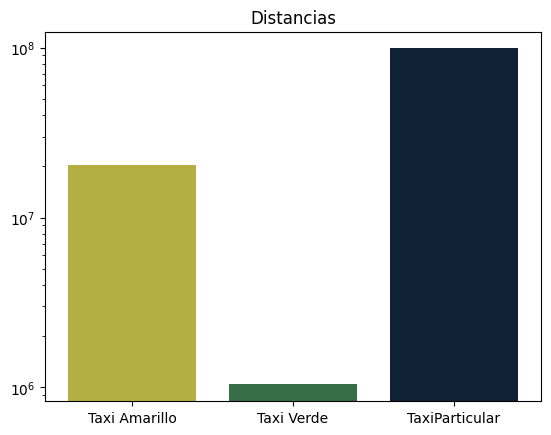

In [29]:
taxis = ["Taxi Amarillo","Taxi Verde","TaxiParticular"]

distanciaAmarillo= taxi_amarillo["trip_distance"].sum()
distanciaVerde = taxi_verde["trip_distance"].sum()
distanciaParticular = taxi_particular["trip_miles"].sum()

distancia = [distanciaAmarillo,distanciaVerde,distanciaParticular]

plt.bar(taxis, distancia, color=["#b5af43","#366e47","#112236"])
plt.yscale("log")
plt.title("Distancias")


### 3. Qué tipo de taxi recibe más propinas en promedio
De acuerdo a la gráfica, se muestra que el Taxi Particular es el que recibe más propinas en promedio.

Text(0.5, 1.0, 'Propinas')

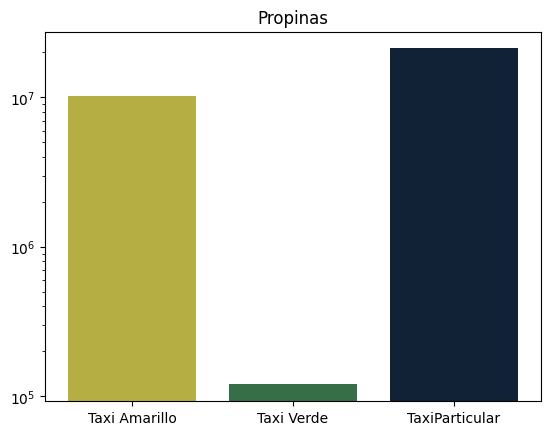

In [32]:
taxis = ["Taxi Amarillo","Taxi Verde","TaxiParticular"]

propinasAmarillo = taxi_amarillo["tip_amount"].sum()
propinasVerde = taxi_verde["tip_amount"].sum()
propinasParticular = taxi_particular["tips"].sum()

propinas = [propinasAmarillo,propinasVerde,propinasParticular]

plt.bar(taxis, propinas, color=["#b5af43","#366e47","#112236"])
plt.yscale("log")
plt.title("Propinas")

### 4. Gráfico de barras reportando el importe del peaje total de cada tipo de Taxi
De acuerdo a la gráfica, se muestra que el Taxi Particular es el que tiene más ganancias totales.

Text(0.5, 1.0, 'Ganancias totales por cada taxi')

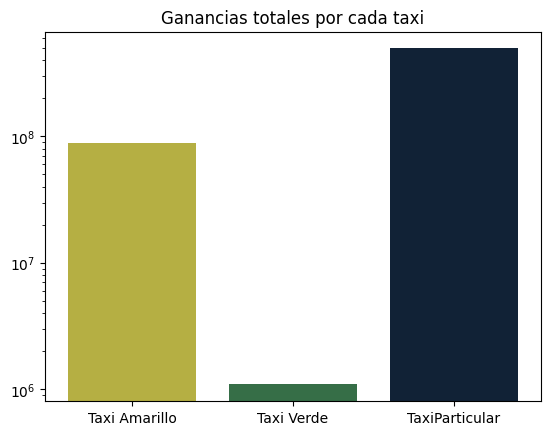

In [34]:
taxis = ["Taxi Amarillo","Taxi Verde","TaxiParticular"]

peajeAmarillo = taxi_amarillo["total_amount"].sum()
peajeVerde = taxi_verde["total_amount"].sum()
peajeParticular = taxi_particular["base_passenger_fare"].sum()

peaje = [peajeAmarillo,peajeVerde,peajeParticular]

plt.bar(taxis, peaje, color=["#b5af43","#366e47","#112236"])
plt.yscale("log")
plt.title("Ganancias totales por cada taxi")